## Importing Libraries

In [1]:
import pandas as pd  #Useful for loading the data set
import numpy as np  #To perform array

## Load Data 

In [2]:
dataset=pd.read_csv("salary.csv")

In [3]:
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


- dataset varialble set hold the complete information of dataset.

## Summarize Dataset

In [4]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


- Here we get the complete information of dataset 
- dataset(dataset.shape) - It shows 32561 Columns and 5 Rows
- dataset(dataset.shape) - It shows top 5 results of the dataset

## Mappning salary data to Binary value

In [5]:
income_set = set(dataset["income"])
dataset["income"]=dataset["income"].map({"<=50K":0, ">50K":1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


- Here we convert the salary data into Binary Value

## Segregating data into X and Y

In [6]:
X = dataset.iloc[:,:-1].values

In [7]:
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

- Here we got the values of X

In [8]:
Y = dataset.iloc[:,-1].values

In [9]:
Y

array([0, 0, 0, ..., 1, 0, 0])

- Here we got the values of Y

## Splitting data set into Train and Test

In [10]:
#Here we are passing both input and output seperately using train_test_split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

## Feature scalling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

- We scale our data to make all the features contribute equilly to the result.
- StandarScalling - By using this method we have rescale our data.
- Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data.

## Finging the best K - Value

In [13]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [14]:
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Mean error')

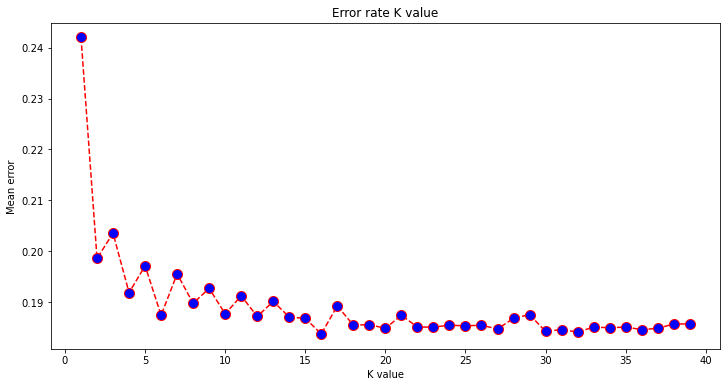

In [15]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title(("Error rate K value"))
plt.xlabel("K value")
plt.ylabel("Mean error")

- Here we got the plot for K - value

## Training 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model=KNeighborsClassifier(n_neighbors=16, metric="minkowski", p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

## Predicting , wheather new customer with age and salry will buy on not¶

In [18]:
age=int(input("Enter new employes age :"))
edu=int(input("Enter new employes education :"))
cg=int(input("Enter new employes capital gain :"))
wh=int(input("Enter new employes working hours :"))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)
if result==1:
    print("Employe might got salry above 50K")
else:
    print("Employe might not got salry above 50K")


Enter new employes age :30
Enter new employes education :9
Enter new employes capital gain :0
Enter new employes working hours :40
[0]
Employe might not got salry above 50K


- Here we Predicted , wheather new customer with age and salry will buy on not

## Prediction for all Test Data

In [19]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


- Prediction for all Test Data

## Evaluating Model - Confusion Matrox

In [20]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [21]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix
[[5882  311]
 [1185  763]]
Accuracy of the Model: 81.62387913032796%


- Conclusion - Accuracy of the Model: 81.62387913032796%